# Colour Temperature Ramblings

## User Defined Illuminant

In [1]:
% matplotlib inline

//anaconda/envs/colour-2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


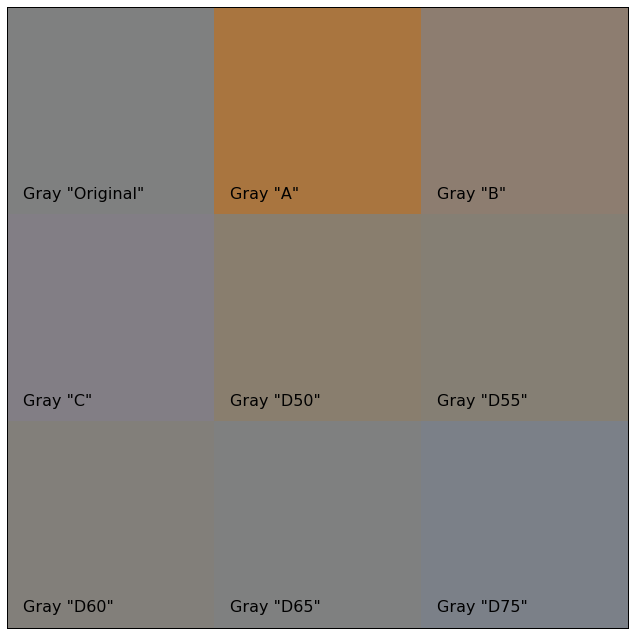

In [2]:
import numpy as np

import colour
from colour.plotting import *

sRGB_w = colour.sRGB_COLOURSPACE.whitepoint
sRGB_XYZ_to_RGB = colour.sRGB_COLOURSPACE.XYZ_to_RGB_matrix
sRGB_RGB_to_XYZ = colour.sRGB_COLOURSPACE.RGB_to_XYZ_matrix
sRGB_oecf = colour.sRGB_COLOURSPACE.OECF
sRGB_eocf = colour.sRGB_COLOURSPACE.EOCF

E = colour.ILLUMINANTS['cie_2_1931']['E']

RGB = (0.5, 0.5, 0.5)

XYZ = colour.RGB_to_XYZ(
    RGB, sRGB_w, E, sRGB_RGB_to_XYZ, 'CAT02', sRGB_eocf)


def temperature(XYZ, illuminant):
    return np.clip(colour.XYZ_to_RGB(
        XYZ, E, illuminant, sRGB_XYZ_to_RGB, 'CAT02', sRGB_oecf), 0, 1)

multi_colour_plot(
    (ColourParameter('Gray "Original"',
                     temperature(
                         XYZ, colour.ILLUMINANTS['cie_2_1931']['D65'])),
     ColourParameter('Gray "A"',
                     temperature(
                         XYZ, colour.ILLUMINANTS['cie_2_1931']['A'])),
     ColourParameter('Gray "B"',
                     temperature(
                         XYZ, colour.ILLUMINANTS['cie_2_1931']['B'])),
     ColourParameter('Gray "C"',
                     temperature(
                         XYZ, colour.ILLUMINANTS['cie_2_1931']['C'])),
     ColourParameter('Gray "D50"',
                     temperature(
                         XYZ, colour.ILLUMINANTS['cie_2_1931']['D50'])),
     ColourParameter('Gray "D55"',
                     temperature(
                         XYZ, colour.ILLUMINANTS['cie_2_1931']['D55'])),
     ColourParameter('Gray "D60"',
                     temperature(
                         XYZ, colour.ILLUMINANTS['cie_2_1931']['D60'])),
     ColourParameter('Gray "D65"',
                     temperature(
                         XYZ, colour.ILLUMINANTS['cie_2_1931']['D65'])),
     ColourParameter('Gray "D75"',
                     temperature(
                         XYZ, colour.ILLUMINANTS['cie_2_1931']['D75']))),
    text_size=16)


## Using Correlated Colour Temperature

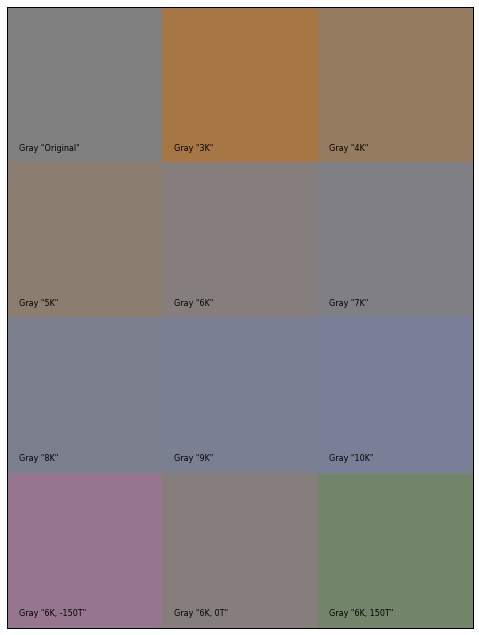

In [3]:
def CCT_to_xy(CCT, tint=0):
    return colour.UCS_uv_to_xy(colour.CCT_to_uv_Ohno2013(CCT, tint / 6000))


multi_colour_plot(
    (ColourParameter('Gray "Original"', RGB),
     ColourParameter('Gray "3K"',
                     temperature(XYZ, CCT_to_xy(3000))),
     ColourParameter('Gray "4K"',
                     temperature(XYZ, CCT_to_xy(4000))),
     ColourParameter('Gray "5K"',
                     temperature(XYZ, CCT_to_xy(5000))),
     ColourParameter('Gray "6K"',
                     temperature(XYZ, CCT_to_xy(6000))),
     ColourParameter('Gray "7K"',
                     temperature(XYZ, CCT_to_xy(7000))),
     ColourParameter('Gray "8K"',
                     temperature(XYZ, CCT_to_xy(8000))),
     ColourParameter('Gray "9K"',
                     temperature(XYZ, CCT_to_xy(9000))),
     ColourParameter('Gray "10K"',
                     temperature(XYZ, CCT_to_xy(10000))),
     ColourParameter('Gray "6K, -150T"',
                     temperature(XYZ, CCT_to_xy(6000, -150.))),
     ColourParameter('Gray "6K, 0T"',
                     temperature(XYZ, CCT_to_xy(6000, 0))),
     ColourParameter('Gray "6K, 150T"',
                     temperature(XYZ, CCT_to_xy(6000, 150.)))),
    text_size=8)
